## Problem set 3

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1a, diabetes dataset EDA (10 points)

We will work with the diabetes dataset in problem 1. Please carefully read the description [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) and [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Read the data into a pandas dataframe using the txt file linked [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Perform EDA by going through questions 1-4 from PS2 2a. 

Additionally, prepare two visualizations using column pairs. The two figures should be different types but one of the columns for both plots should be the target variable. Include a caption for each of the figures describing what the plot shows.

In [3]:
# your code here

In [4]:
import numpy as np
data = np.loadtxt("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",dtype = 'object', delimiter = '\t')
print(data)

[['AGE' 'SEX' 'BMI' ... 'S5' 'S6' 'Y']
 ['59' '2' '32.1' ... '4.8598' '87' '151']
 ['48' '1' '21.6' ... '3.8918' '69' '75']
 ...
 ['60' '2' '24.9' ... '4.1271' '95' '132']
 ['36' '1' '30' ... '5.1299' '85' '220']
 ['36' '1' '19.6' ... '4.5951' '92' '57']]


In [5]:
import pandas as pd
df = pd.DataFrame(data, columns = data[0])
df.drop([0], inplace=True)
df = pd.DataFrame(df,dtype=float)
df['AGE'] = df['AGE'].astype(int)
df['SEX'] = df['SEX'].astype(int)
print(df)

     AGE  SEX   BMI      BP     S1     S2    S3    S4      S5     S6      Y
1     59    2  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0  151.0
2     48    1  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   75.0
3     72    2  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0  141.0
4     24    1  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0  206.0
5     50    1  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0  135.0
..   ...  ...   ...     ...    ...    ...   ...   ...     ...    ...    ...
438   60    2  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0  178.0
439   47    2  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0  104.0
440   60    2  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0  132.0
441   36    1  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0  220.0
442   36    1  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   57.0

[442 rows x 11 columns]


In [6]:
print('The quantity of row in dataframe is:',df.shape[0])
print('The quantity of column in dataframe is:',df.shape[1])
print(df.dtypes)

The quantity of row in dataframe is: 442
The quantity of column in dataframe is: 11
AGE      int64
SEX      int64
BMI    float64
BP     float64
S1     float64
S2     float64
S3     float64
S4     float64
S5     float64
S6     float64
Y      float64
dtype: object


In [7]:
df['Y'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

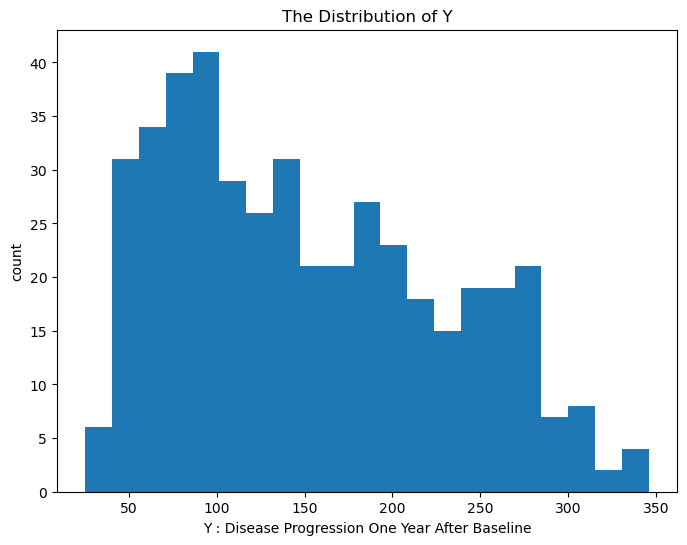

In [8]:
import matplotlib
from matplotlib import pylab as plt
plt.figure(figsize=(8,6))
plt.hist(df['Y'],bins = int(np.sqrt(df.shape[0])))
plt.xlabel('Y : Disease Progression One Year After Baseline')
plt.ylabel('count')
plt.title('The Distribution of Y')
plt.show()

In [9]:
df['S1'].describe()

count    442.000000
mean     189.140271
std       34.608052
min       97.000000
25%      164.250000
50%      186.000000
75%      209.750000
max      301.000000
Name: S1, dtype: float64

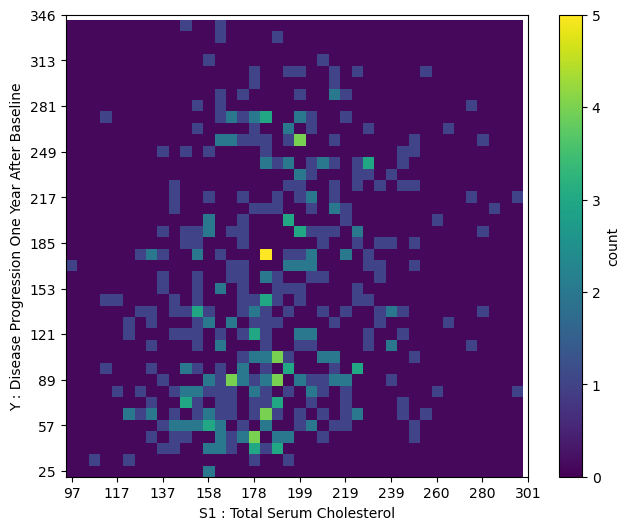

In [10]:
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['S1'], df['Y'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1
plt.figure(figsize=(8,6))
plt.imshow(heatmap.T, origin='lower',vmin=0)
plt.xlabel('S1 : Total Serum Cholesterol')
plt.ylabel('Y : Disease Progression One Year After Baseline')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='count')
plt.show()

From this heatmap, we can easily figure out that the value of quantitative measure of disease progression is larger if people's total serum cholesterol is between 158 and 219, and many people whose total serum cholesterol is around 180 have around 185 value in the quantitative measure of disease progression.

In [11]:
df['SEX'].value_counts()

SEX
1    235
2    207
Name: count, dtype: int64

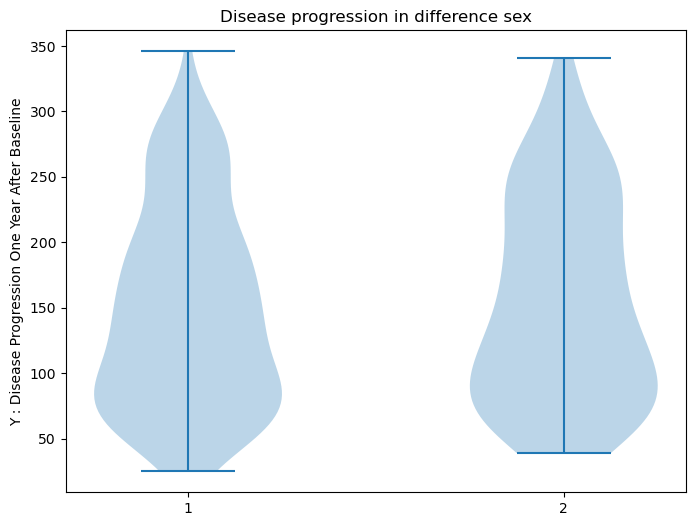

In [12]:
dataset = [df[df['SEX']==1]['Y'].values,
           df[df['SEX']==2]['Y'].values]
plt.figure(figsize=(8,6))
plt.violinplot(dataset)
plt.xticks([1,2])
plt.ylabel('Y : Disease Progression One Year After Baseline')
plt.title('Disease progression in difference sex')
plt.show()

From this violinplot, we can easily figure out that the quantitative measure of disease progression (Y) of people, whose sex equals to 1, ranges wider than that of people whose sex eaquls to 2, and also the average of Y of people, whose sex equals to 1, is lower than that of people whose sex equals to 2.

### Problem 1b, basic split (10 points)

Write a general function that performs basic splitting on a dataset, while also conducting integrity tests on both its inputs and outputs. Let's call the function basic_split. It takes the following arguments as inputs: feature matrix (X), a target variable (y), train_size, val_size, test_size, and random_state. The output of the function should be: X_train, y_train, X_val, y_val, X_test, y_test. 

Perform the following tests inside the function and raise a value error with a message if one or more of the tests fail.

Test the inputs:
- the sum of train_size, val_size, test_size is 1
- random_state is an integer

Use train_test_split.

Test the outputs:
- check that the output sizes are what you want them to be

Note that in principle you could add more tests. For example:
- test if X is a 2d pandas data frame
- test if y is a 1d pandas series
- check if the number of rows in X is the same as the length of y

These tests are included in train_test_split, so we don't need to explicitly add them to our code. However, if you were to split your data manually without train_test_split, it would be a good idea to add these additional tests and potentially more.

Apply the function to the diabetes dataset with train_size = 0.6, val_size = 0.2, and test_size = 0.2. Print out the head of X_train, X_val, and X_test. Make sure that you get the same points in each set every time you rerun the cell (a.k.a., check for reproducability).

This function is general purpose, you'll be able to reuse it for any project if you want to perform basic split on your data.

In [13]:
# your code here

from sklearn.model_selection import train_test_split 
def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    if train_size+val_size+test_size != 1:
        print('The sum of train_size, val_size and test_size is not equal to 1! Please modify your split size.')
    elif type(random_state) != int:
        print('The random_state is not an integer! Please input an integer for random_state.')
    elif X.ndim != 2:
        print('The dimension of X is not 2! Please input a 2D pandas dataframe for X.')
    elif y.ndim != 1:
        print('The dimension of y is not 1! Please input a 1D pandas series for y.')
    elif X.shape[0] != len(y):
        print('The number of rows in X is not same as the length of y! Please check your input data set X and y.')
    else:
        # First split to separate out the training set:
        X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
        # Second split to separate out the validation set and the test set:
        X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size=val_size/(val_size+test_size),random_state=random_state)
        if round(X_train.shape[0]/X.shape[0],1) != train_size or round(len(y_train)/len(y),1) != train_size:
            print('The number of rows in X_train or y_train is not equal to the train_size you input! Please check.')
            X_train,y_train,X_val,y_val,X_test,y_test = None,None,None,None,None,None
            return X_train,y_train,X_val,y_val,X_test,y_test
        elif round(X_val.shape[0]/X.shape[0],1) != val_size or round(len(y_val)/len(y),1) != val_size:
            print('The number of rows in X_val or y_val is not equal to the val_size you input! Please check.')
            X_train,y_train,X_val,y_val,X_test,y_test = None,None,None,None,None,None
            return X_train,y_train,X_val,y_val,X_test,y_test
        elif round(X_test.shape[0]/X.shape[0],1) != test_size or round(len(y_test)/len(y),1) != test_size:
            print('The number of rows in X_test or y_test is not equal to the test_size you input! Please check.')
            X_train,y_train,X_val,y_val,X_test,y_test = None,None,None,None,None,None
            return X_train,y_train,X_val,y_val,X_test,y_test
        else:
            return X_train,y_train,X_val,y_val,X_test,y_test

In [14]:
X_columns = df.columns != 'Y'
X_df = df.loc[:,X_columns]
y_df = df['Y']
print(X_df)
print(y_df)

     AGE  SEX   BMI      BP     S1     S2    S3    S4      S5     S6
1     59    2  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
2     48    1  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
3     72    2  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
4     24    1  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
5     50    1  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
..   ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
438   60    2  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
439   47    2  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
440   60    2  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
441   36    1  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
442   36    1  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0

[442 rows x 10 columns]
1      151.0
2       75.0
3      141.0
4      206.0
5      135.0
       ...  
438    178.0
439    104.0
440    132.0
441    220.0
442     57.0
Name

In [15]:
random_state_df = 1030
train_size_df = 0.6
val_size_df = 0.2
test_size_df = 0.2
X_train_df,y_train_df,X_val_df,y_val_df,X_test_df,y_test_df = basic_split(X_df,y_df,train_size_df,val_size_df,test_size_df,random_state_df)

In [16]:
print(X_train_df.head())
print(X_train_df.shape)

print(X_val_df.head())
print(X_val_df.shape)

print(X_test_df.head())
print(X_test_df.shape)

     AGE  SEX   BMI    BP     S1     S2    S3   S4      S5     S6
420   43    1  21.3  79.0  141.0   78.8  53.0  3.0  3.8286   90.0
246   41    1  23.1  86.0  148.0   78.0  58.0  3.0  4.0943   60.0
76    46    2  23.5  87.0  181.0  114.8  44.0  4.0  4.7095   98.0
382   29    2  18.1  73.0  158.0   99.0  41.0  4.0  4.4998   78.0
240   55    1  28.2  91.0  250.0  140.2  67.0  4.0  5.3660  103.0
(265, 10)
     AGE  SEX   BMI     BP     S1     S2    S3   S4      S5     S6
41    50    2  25.6  101.0  229.0  162.2  43.0  5.0  4.7791  114.0
47    33    1  25.3   85.0  155.0   85.0  51.0  3.0  4.5539   70.0
185   53    1  28.6   88.0  171.0   98.8  41.0  4.0  5.0499   99.0
370   46    1  29.9   83.0  171.0  113.0  38.0  4.5  4.5850   98.0
107   22    1  19.3   82.0  156.0   93.2  52.0  3.0  3.9890   71.0
(88, 10)
     AGE  SEX   BMI     BP     S1     S2    S3   S4      S5     S6
407   33    1  18.9   70.0  162.0   91.8  59.0  3.0  4.0254   58.0
221   55    2  22.7   93.0  154.0   94.2  53.0  3

**Q1b Check:** Is your function reproducible? How do you know? (1 point)

In [17]:
result = dict()
for I in (1,2,3,4):
    result[I] = basic_split(X_df,y_df,train_size_df,val_size_df,test_size_df,random_state_df)[-1]
    print('The %sth result is:\n '%I,result[I])
#print(result)

The 1th result is:
  407     72.0
221     78.0
405    293.0
164    131.0
52     225.0
       ...  
116    229.0
203    196.0
343    178.0
65      71.0
212     70.0
Name: Y, Length: 89, dtype: float64
The 2th result is:
  407     72.0
221     78.0
405    293.0
164    131.0
52     225.0
       ...  
116    229.0
203    196.0
343    178.0
65      71.0
212     70.0
Name: Y, Length: 89, dtype: float64
The 3th result is:
  407     72.0
221     78.0
405    293.0
164    131.0
52     225.0
       ...  
116    229.0
203    196.0
343    178.0
65      71.0
212     70.0
Name: Y, Length: 89, dtype: float64
The 4th result is:
  407     72.0
221     78.0
405    293.0
164    131.0
52     225.0
       ...  
116    229.0
203    196.0
343    178.0
65      71.0
212     70.0
Name: Y, Length: 89, dtype: float64


From the output, we can find that no matter how many times we rerun the code, the result will be always same if we set up a fixed random_state.

### Problem 1c, stratified regression (5 points)

I mentioned in class that sklearn's splitting methods can only stratify with respect to a classification target variable. However you might encounter scenarios where it is necessary to stratify on a regression target variable. For example, it is a good idea to stratify if the distribution of the regression target variable is heavy-tailed (e.g., exponential, log-normal). If you do not stratify, some of your sets might not contain rare values from the heavy tail thus throwing off the regression model.

Either come up with an algorithm to stratify with respect to a regression target variable and write [pseudocode](https://en.wikipedia.org/wiki/Pseudocode) in a markdown cell below to explain the steps of the alrogithm; or do some reading online and write a paragraph or two to explain already existing algorithms/approaches to solve the problem and add your references.

In [18]:
# your answer here

#### Suppose we have a data set DF with a regression target variable DF_y and other features (DF_X1,DF_X2,...,DF_Xn):

import numpy as np

X_columns = DF.columns != 'DF_y'

DF_X = DF.loc[:,X_columns]

DF_y = DF['DF_y']

nrows = DF.shape[0]

bins = np.linspace(np.min(DF['DF_y']),np.max(DF['DF_y']),int(np.sqrt(nrows)))

y_binned = np.digitize(DF['DF_y'],bins)

X_train, X_other, y_train, y_other = train_test_split(DF_X,DF_y,train_size=train_size, stratify=y_binned, random_state=random_state)

y_binned_other = y_binned[y_other.index.tolist]

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size=val_size/(val_size+test_size),stratify=y_binned_other,random_state=random_state)

##### Explanation:
(1) Firstly, extract the feature data set X and the regression target variable y as usual.

(2) Secondly, set up a bin in an arithmetic progression, of which the start value is the minimun of y and the end value is the maximun of y, and the common difference is int(np.sqrt(nrows)).

(3) Thirdly, split the regression target variable y into different interval(groups) according to the bin by np.digitize, and we can denote the group name each y belongs to as y_binned. That is, for example, if y[1] belongs to the 10th interval(or the 10th group), the y_binned[1] equals to 10, and same as other value in y. Then, for each value in y, they belong to an interval(group). So we can convert a continuous variable into a categorical variable.

(4)Finally, use the train_test_split function to split the data set into train, validation, test data set in the size we want as usual.

##### Reference:
[Michael J. Sanders](https://michaeljsanders.com/2017/03/24/stratify-continuous-variable.html)

### Problem 2

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures) in problem 2. Please carefully read the dataset description and perform as much EDA as you can on this dataset. The EDA is not graded but it will help you to correctly answer 2a and 2b.

This dataset has group structure: 14 users performing 5 different hand postures while wearing sensors attached to a left-handed glove. Two different ML questions can be asked using this dataset. We will explore how splitting differs for both questions in 2a and 2b.

**A note on splitting non-IID data:** The Independent and Identically Distributed (IID) assumption asserts two foundational premises: (1) the values of one datapoint (i.e. row) in our dataset have no impact on the values of another datapoint, and (2) all of the datapoints come from the same distribution. When this assumption holds, we can perform basic splitting techniques as explored above, since the make-up of our training, validation, and test sets will be independent of one another. However, many ML problems involve using data that does not conform to the IID assumption, such as data with a group or time-series structure. When your dataset has a group structure, datapoints from one group may be drawn from a different distribution than datapoints from another group. Furthermore, the datapoints in a time-series dataset have some correlation with one another, and therefore the values of one point may implicitly hint at the values of another. This raises the issue of data leakage; the model can train on data that unfairly gives it an advantage when predicting the values in its test set. For instance, if you are trying to predict the price of a stock, and the model trains on share price data from 2023, it will have undue insight when trying to predict the price in 2022. A general rule of thumb is that your model should not train on data that it would not have available when deployed. Therefore, you can use 2022 stock price data (in your train set) to predict 2023 values (in your test set), but not the other way around. These splitting strategies are specific to every dataset and ML problem. When designing a new pipeline with a non-IID dataset, think about how your model will be deployed in order to inform the splitting stratedgy you use to train and test it.  

### Problem 2a (10 points)

How would you split the dataset if we wanted to know how accurately we can predict the hand postures of a new, previously unseen user? What's the target variable? Write down your reasoning (the usual 1-2 paragraphs are fine). Split the dataset into training, validation, and test sets. As usual, check for reproducability!

Add your explanation here:

#### Explanation:
From the original dataset, we can easily find that there are more than one datapoint(row) for each user, so there may have a group structure problem, which means the dataset is non-IID. In order to deal with this problem, we need to split data by using GroupKFold method or GroupShuffleSplit method. Because there are 14 users which means 14 groups in dataset, it's better for us to use GroupShuffleSplit because the number of group is large.

Additionally, from the dataset itself and the data description, we could get that the target variable is 'Class', which represents the class ID of the given record, and it ranges from 1 to 5 with 1=Fist(with thumb out), 2=Stop(hand flat), 3=Point1(point with pointer finger), 4=Point2(point with pointer and middle fingers), 5=Grab(fingers curled as if to grab).


In [19]:
# add your code here
posture_data = pd.read_csv("/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps3-splitting-XXXXiner/data/Postures.csv")
print(posture_data.head())

   Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]


In [20]:
df = posture_data.drop(labels=0,axis=0) # drop the first row 
X = df.drop(columns=['Class','User'])
Y = df['Class']
groups = df['User']

print(X.head())
print(X.shape)
print(X.dtypes)

print(Y.head())
print(Y.shape)
print(Y.dtypes)

print(groups.head())
print(groups.shape)
print(groups.dtypes)

          X0         Y0         Z0         X1         Y1         Z1  \
1  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
2  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
3  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
4  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   
5  55.142401  71.435607 -64.177303  36.175818  81.556874 -53.475747   

          X2         Y2         Z2                X3  ... Z8 X9 Y9 Z9 X10 Y10  \
1  36.621229  81.680557 -52.919272  85.2322638852917  ...  ?  ?  ?  ?   ?   ?   
2  79.223743  43.254091 -69.982489  87.4508729469625  ...  ?  ?  ?  ?   ?   ?   
3  78.451526  43.567403 -70.658489  86.8353875680762  ...  ?  ?  ?  ?   ?   ?   
4  86.320630  68.214645 -72.228461  61.5961571288978  ...  ?  ?  ?  ?   ?   ?   
5  76.986143  42.426849 -72.574743  86.3687480605765  ...  ?  ?  ?  ?   ?   ?   

  Z10 X11 Y11 Z11  
1   ?   ?   ?   ?  
2   ?   ?   ?   ?  
3   ?   ?   ?   ?  
4   ? 

In [21]:
Y.value_counts()

Class
3    16344
1    16265
5    15733
2    14978
4    14775
Name: count, dtype: int64

Text(0.5, 1.0, 'The distribution of Class')

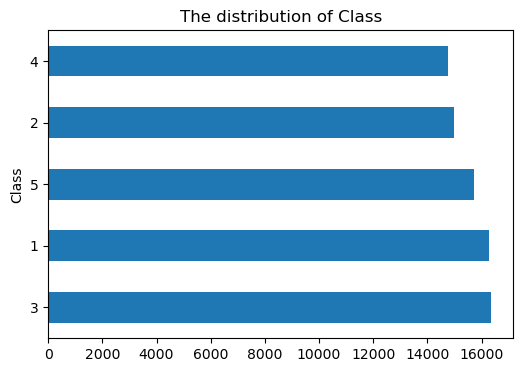

In [22]:
plt.figure(figsize=(6,4))
pd.value_counts(Y).plot.barh()
plt.title('The distribution of Class')

In [25]:
from sklearn.model_selection import GroupShuffleSplit

# Define the splitter with the desired sizes
gss = GroupShuffleSplit(n_splits=10, train_size=0.6, test_size=0.2, random_state=0)

for train_idx, test_idx in gss.split(X, Y, groups):
    # Split into train, validation, and test sets
    X_train = X.iloc[train_idx]
    Y_train = Y.iloc[train_idx]
    
    X_temp = X.iloc[test_idx]
    Y_temp = Y.iloc[test_idx]
    
    # Further split into validation and test sets
    val_size = 0.2  # Percentage of the data for validation
    val_split = int(val_size * len(X_temp))
    
    X_val = X_temp.iloc[:val_split]
    Y_val = Y_temp.iloc[:val_split]
    
    X_test = X_temp.iloc[val_split:]
    Y_test = Y_temp.iloc[val_split:]
    
    # Print sizes for verification
    print("Train:", X_train.index, '\n', "Validation:", X_val.index, '\n', "Test:", X_test.index)
    print("Train size:", len(X_train))
    print("Validation size:", len(X_val))
    print("Test size:", len(X_test))
    print('\n')

Train: Index([ 9049,  9050,  9051,  9052,  9053,  9054,  9055,  9056,  9057,  9058,
       ...
       78086, 78087, 78088, 78089, 78090, 78091, 78092, 78093, 78094, 78095],
      dtype='int64', length=46414) 
 Validation: Index([18658, 18659, 18660, 18661, 18662, 18663, 18664, 18665, 18666, 18667,
       ...
       20551, 20552, 20553, 20554, 20555, 20556, 20557, 20558, 20559, 20560],
      dtype='int64', length=1903) 
 Test: Index([20561, 20562, 20563, 20564, 20565, 20566, 20567, 20568, 20569, 20570,
       ...
       39353, 39354, 39355, 39356, 39357, 39358, 39359, 39360, 39361, 39362],
      dtype='int64', length=7614)
Train size: 46414
Validation size: 1903
Test size: 7614


Train: Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       78086, 78087, 78088, 78089, 78090, 78091, 78092, 78093, 78094, 78095],
      dtype='int64', length=48106) 
 Validation: Index([13766, 13767, 13768, 13769, 13770, 13771, 13772, 13773, 13774, 13775,
       ...
  

#### Reproducibility Check:
We can rerun the code cell above manually for many times, and we can see that the index of traing set, validation set, test set is always same no matter how many times I rerun the GroupShuffleSplit code above.

### Problem 2b (10 points)

How would you split the data if we wanted to identify a user based on their hand postures? What's the target variable? Follow the same steps as in 2a (explain your reasoning, split, check reproducability).

Add your explanation here:


#### Explanation:
Because we do not need to predict the hand postures from a new, previously unseen user, but we need to identify a user based on their hand postures, which means we need to identify out which users that hand postures belong to based on available information. So, the target variable should be 'User', but not 'Class'. Also, because different users have different numbers of datapoints, which means some of the users have more datapoint but some of them have less, or even their dataset are 'rare'. Therefore, in order to use all the information of hand postures from all users, we need to split the datapoint of each user into train, validation, and test data set evenly. To achieve that, we need to choose StratifiedKFold spliiting method.

In [30]:
groups.value_counts()

User
10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: count, dtype: int64

Text(0.5, 1.0, 'The quantity of datapoint of each user')

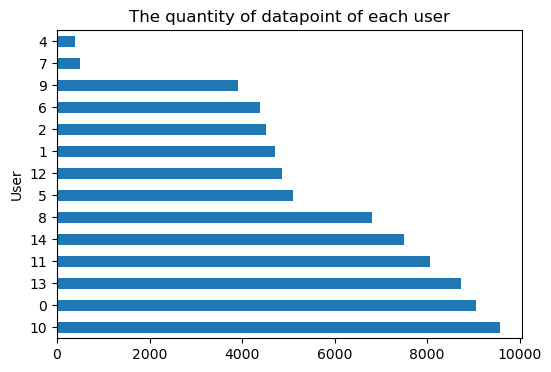

In [31]:
plt.figure(figsize = (6,4))
pd.value_counts(groups).plot.barh()
plt.title('The quantity of datapoint of each user')

In [32]:
# add you code here
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold

random_state = 1030
# stratified train-test split
X_other, X_test, Y_other, Y_test = train_test_split(X,groups,test_size = 0.2,stratify=groups,random_state=random_state)
print('test balance:',np.unique(Y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,Y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = Y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = Y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([1810,  943,  903,   76, 1021,  875,   98, 1362,  784, 1915, 1612,
        973, 1748, 1499]))
new fold
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([5428, 2830, 2707,  228, 3063, 2626,  296, 4087, 2352, 5744, 4836,
       2919, 5244, 4497]))
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([1810,  944,  903,   75, 1021,  876,   98, 1362,  784, 1914, 1613,
        973, 1747, 1499]))
new fold
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([5428, 2830, 2708,  227, 3063, 2627,  295, 4087, 2352, 5744, 4837,
       2919, 5243, 4497]))
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([1810,  944,  902,   76, 1021,  875,   99, 1362,  784, 1914, 1612,
        973, 1748, 1499]))
new fold
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([5429, 2831, 2708,  227, 3063, 2627,  295, 4086, 2352, 57

#### Reproducibility Check:
We can rerun the code cell above manually for many times, and we can see that the index of traing set, validation set, test set is always same no matter how many times I rerun the StratifiedKFold code above.